# Plot evaluation results from Urban-PLUMBER
- This script is used to plot evaluation results of single-point simulations from Urban-PLUMBER.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

In [2]:
df_site_model = pd.read_csv('./data_for_figure/site_model_summary.csv')
df_site_model.head()

,flux,experiment,MAE,MBE,nSD,R,5th,95th,RMSE,cRMSE,AMBE,1-nSD,1-R,nSkewness,nKurtosis,Overlap,site,model
0,SWup,baseline,2.98882,0.900153,1.005940,0.996055,0.478753,0.303096,4.25611,0.089283,0.900153,0.005936,0.003945,0.086279,0.178836,0.068732,AU-Preston,CLMU5
1,SWup,detailed,2.73408,-0.179863,1.013290,0.996805,0.545667,2.264600,3.80392,0.081552,0.179863,0.013288,0.003195,0.026835,0.051883,0.063041,AU-Preston,CLMU5
2,LWup,baseline,12.16520,9.981450,1.193420,0.971495,5.374060,33.935900,16.90830,0.324729,9.981450,0.193418,0.028505,0.167589,0.189830,0.098797,AU-Preston,CLMU5
3,LWup,detailed,13.57490,11.714500,1.240660,0.968380,4.305360,40.890700,19.44530,0.369289,11.714500,0.240653,0.031620,0.151606,0.131948,0.094386,AU-Preston,CLMU5
4,Qle,baseline,22.95310,-3.692590,0.966173,0.708790,9.611410,12.137400,36.84560,0.750909,3.692590,0.033828,0.291210,0.209044,0.219815,0.276042,AU-Preston,CLMU5


In [3]:
site_list = df_site_model['site'].unique()
climate_zone_list = ['Temperate', 'Temperate', 'Temperate', 'Cold', 
                     'Cold', 'Temperate', 'Temperate', 'Cold', 'Cold',
                     'Cold', 'Temperate', 'Temperate', 'Cold',
                     'Cold', 'Tropical', 'Temperate', 'Temperate',
                     'Cold', 'Cold', 'Cold',
                     'Arid']
site_list

array(['AU-Preston', 'AU-SurreyHills', 'CA-Sunset', 'FI-Kumpula',
       'FI-Torni', 'FR-Capitole', 'GR-HECKOR', 'JP-Yoyogi', 'KR-Jungnang',
       'KR-Ochang', 'MX-Escandon', 'NL-Amsterdam', 'PL-Lipowa',
       'PL-Narutowicza', 'SG-TelokKurau', 'UK-KingsCollege', 'UK-Swindon',
       'US-Baltimore', 'US-Minneapolis1', 'US-Minneapolis2',
       'US-WestPhoenix'], dtype=object)

In [4]:
print(len(site_list))

21


In [4]:
var_list = ['SWup', 'LWup', 'Qh', 'Qle']
title_list = ['$SW_\mathrm{up}$', '$LW_\mathrm{up}$', '$Q_\mathrm{h}$', '$Q_\mathrm{le}$']
nrows = 2
ncols = 2
#max_list = [80, 60, 60, 60]
linewidth = 0.5
fontsize = 6
labelcolor = '#6b6b6b'
labelfont = 6
pad = 1
handletextpad = 0.5
length = 2
xwidth = 0.5
padding = 4
#metric = 'MAE'
#metric='RMSE'
metric='MBE'
markersize = 8
marker_list = ['o', 's']
lc1 = '#1b9e77'
lc2 = '#d95f02'
lc3 = '#7570b3'
lc4 = '#e7298a'
zone_color_mapping = {
    'Temperate': lc1,
    'Arid': lc2,
    'Cold': lc3,
    'Tropical': lc4
}
color_list = [zone_color_mapping[zone] for zone in climate_zone_list]

/tmp/ipykernel_1189852/1985587014.py:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax[i].plot([min, max], [min, max], 'k--', linewidth=linewidth, color=labelcolor)


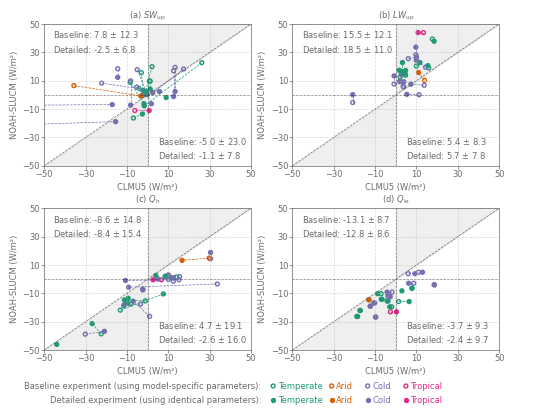

In [40]:
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5, 4))
ax = axes.flatten()
if metric == 'MBE':
    min = -50
    max = 50
elif metric == 'RMSE':
    min = 0
    max = 80

for i in range(len(var_list)):
    var = var_list[i]
    df_var = df_site_model[df_site_model['flux'] == var]
    df_var_clmu5 = df_var[df_var['model'] == 'CLMU5']
    df_var_noah = df_var[df_var['model'] == 'NOAH-SLUCM']
    ax[i].axhline(0, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
    ax[i].axvline(0, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
    #max = max_list[i]
    for e, experiment in enumerate(['baseline', 'detailed']):
        #maker = marker_list[e]
        if e==0:
            facecoler = 'none'
        else:
            facecoler = color_list
            #facecoler = labelcolor
        ax[i].scatter(df_var_clmu5[df_var_clmu5['experiment'] == experiment][metric].values,
                      df_var_noah[df_var_noah['experiment'] == experiment][metric].values,
                      #marker=maker, 
                      s=markersize, color=color_list, facecolors=facecoler)           

    baseline_x = df_var_clmu5[df_var_clmu5['experiment'] == 'baseline'][metric].values # CLMU5
    baseline_y = df_var_noah[df_var_noah['experiment'] == 'baseline'][metric].values # NOAH-SLUCM
    detailed_x = df_var_clmu5[df_var_clmu5['experiment'] == 'detailed'][metric].values
    detailed_y = df_var_noah[df_var_noah['experiment'] == 'detailed'][metric].values
    # Draw lines between baseline and detailed
    for x0, y0, x1, y1, linecolor in zip(baseline_x, baseline_y, detailed_x, detailed_y, color_list):
        ax[i].plot([x0, x1], [y0, y1], color=linecolor, linestyle='--', linewidth=linewidth)   
    average_baseline_x = np.round(np.nanmedian(baseline_x),1)
    average_baseline_y = np.round(np.nanmean(baseline_y),1)
    average_detailed_x = np.round(np.nanmean(detailed_x),1)
    average_detailed_y = np.round(np.nanmean(detailed_y),1)
    std_detailed_x = np.round(np.nanstd(detailed_x), 1)
    std_baseline_y = np.round(np.nanstd(baseline_y), 1)
    std_baseline_x = np.round(np.nanstd(baseline_x), 1)
    std_detailed_y = np.round(np.nanstd(detailed_y), 1)
    ax[i].text(0.045, 0.9, f'Baseline: {average_baseline_y} $\pm$ {std_baseline_y}', fontsize=fontsize, color=labelcolor, transform=ax[i].transAxes)
    ax[i].text(0.045, 0.8, f'Detailed: {average_detailed_y} $\pm$ {std_detailed_y}', fontsize=fontsize, color=labelcolor, transform=ax[i].transAxes)
    ax[i].text(0.55, 0.15, f'Baseline: {average_baseline_x} $\pm$ {std_baseline_x}', fontsize=fontsize, color=labelcolor, transform=ax[i].transAxes)
    ax[i].text(0.55, 0.05, f'Detailed: {average_detailed_x} $\pm$ {std_detailed_x}', fontsize=fontsize, color=labelcolor, transform=ax[i].transAxes)
    ax[i].set_xlabel('CLMU5 (W/m²)', fontsize=fontsize, color=labelcolor, labelpad=2.5)
    ax[i].set_ylabel('NOAH-SLUCM (W/m²)', fontsize=fontsize, color=labelcolor, labelpad=2.5)     
    ax[i].set_xlim(min, max)
    ax[i].set_ylim(min, max)
    ax[i].plot([min, max], [min, max], 'k--', linewidth=linewidth, color=labelcolor)
    ax[i].set_yticks(range(min, max+1, 20))
    ax[i].set_xticks(range(min, max+1, 20))
    ax[i].tick_params(axis='y', which='both', left=True, right=False, labelright=False, labelcolor=labelcolor, color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)   
    ax[i].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)  
    ax[i].set_title(f'({string.ascii_lowercase[i]}) {title_list[i]}',fontsize=labelfont,color=labelcolor, pad = padding)  
    ax[i].grid(True,linestyle='--',linewidth=0.5, alpha=0.5)
    ax[i].fill([0, 0, max], [0, max, max], color=labelcolor, alpha=0.1)
    ax[i].fill([min, 0, 0], [min, min, 0], color=labelcolor, alpha=0.1)
    for spine in ax[i].spines.values():
        spine.set_linewidth(xwidth)
        spine.set_edgecolor(labelcolor)         
plt.subplots_adjust(left=0.07, right=0.98, bottom=0.15, top=0.965, wspace=0.2, hspace=0.3) 
# Add legend
legend_ax = fig.add_axes([0.15, 0.01, 0.9, 0.1]) # [left, bottom, width, height] in figure coords
legend_ax.axis('off')
color_list2 = [lc1, lc2, lc3, lc4]
climate_list2 = ['Temperate', 'Arid', 'Cold', 'Tropical']
#x_positions = np.linspace(0.4, 0.85, len(climate_list2))
x_positions = [0.42, 0.55, 0.63, 0.715]
y_position = 0.5  # Middle of the hidden axis
y_offset = 0.35
# Plot scatter markers and text
for x, label, color in zip(x_positions, climate_list2, color_list2):
    legend_ax.scatter(x, y_position, s=markersize, facecolors='none', edgecolors=color, transform=legend_ax.transAxes)
    legend_ax.text(x + 0.01, y_position, label, fontsize=fontsize, color=color, ha='left', va='center', transform=legend_ax.transAxes)
    legend_ax.scatter(x, y_position-y_offset, s=markersize, facecolors=color, edgecolors=color, transform=legend_ax.transAxes)
    legend_ax.text(x + 0.01, y_position-y_offset, label, fontsize=fontsize, color=color, ha='left', va='center', transform=legend_ax.transAxes)
legend_ax.text(0.4, y_position, 'Baseline experiment (using model-specific parameters): ', fontsize=fontsize, color=labelcolor, ha='right', va='center', transform=legend_ax.transAxes)
legend_ax.text(0.4, y_position-y_offset, 'Detailed experiment (using identical parameters): ', fontsize=fontsize, color=labelcolor, ha='right', va='center', transform=legend_ax.transAxes)
fig.savefig(f'CLMU-NOAH_{metric}.png', dpi=300)   
fig.savefig(f'CLMU-NOAH_{metric}.pdf', dpi=600)                   

In [23]:
x_positions 

array([0.45, 0.75, 1.05, 1.35])

# Description

In [82]:
df_site_model = pd.read_csv('./data_for_figure/site_model_summary.csv')
df_site_model_MAE = df_site_model[['flux', 'experiment', 'MBE', 'site', 'model']]
df_site_model_MAE = df_site_model_MAE[df_site_model_MAE['flux'].isin(['SWup', 'LWup', 'Qle', 'Qh'])]
df_site_model_MAE

,flux,experiment,MBE,site,model
0,SWup,baseline,0.900153,AU-Preston,CLMU5
1,SWup,detailed,-0.179863,AU-Preston,CLMU5
2,LWup,baseline,9.981450,AU-Preston,CLMU5
3,LWup,detailed,11.714500,AU-Preston,CLMU5
4,Qle,baseline,-3.692590,AU-Preston,CLMU5
...,...,...,...,...,...
419,LWup,detailed,15.708600,US-WestPhoenix,NOAH-SLUCM
420,Qle,baseline,-14.543900,US-WestPhoenix,NOAH-SLUCM
421,Qle,detailed,-14.542300,US-WestPhoenix,NOAH-SLUCM
422,Qh,baseline,14.852700,US-WestPhoenix,NOAH-SLUCM


In [83]:
df_site_model_MAE_clmu = df_site_model_MAE[df_site_model_MAE['model'] == 'CLMU5'].reset_index(drop=True)
df_site_model_MAE_noah = df_site_model_MAE[df_site_model_MAE['model'] == 'NOAH-SLUCM'].reset_index(drop=True)
df_site_model_MAE_noah['diff_MBE'] = df_site_model_MAE_noah['MBE'] - df_site_model_MAE_clmu['MBE']
df_site_model_MAE_noah

,flux,experiment,MBE,site,model,diff_MBE
0,SWup,baseline,9.719040,AU-Preston,NOAH-SLUCM,8.818887
1,SWup,detailed,0.221401,AU-Preston,NOAH-SLUCM,0.401264
2,LWup,baseline,20.376900,AU-Preston,NOAH-SLUCM,10.395450
3,LWup,detailed,22.784700,AU-Preston,NOAH-SLUCM,11.070200
4,Qle,baseline,-15.474100,AU-Preston,NOAH-SLUCM,-11.781510
...,...,...,...,...,...,...
163,LWup,detailed,15.708600,US-WestPhoenix,NOAH-SLUCM,4.682200
164,Qle,baseline,-14.543900,US-WestPhoenix,NOAH-SLUCM,-1.474900
165,Qle,detailed,-14.542300,US-WestPhoenix,NOAH-SLUCM,-1.607400
166,Qh,baseline,14.852700,US-WestPhoenix,NOAH-SLUCM,-14.916900


In [86]:
df_site_model_MAE_average = (
    df_site_model_MAE
    .groupby(['experiment', 'flux', 'model'])['MBE']
    .mean() # median()
    .reset_index()
)
df_site_model_MAE_average

,experiment,flux,model,MBE
0,baseline,LWup,CLMU5,6.429239
1,baseline,LWup,NOAH-SLUCM,15.460206
2,baseline,Qh,CLMU5,2.196876
3,baseline,Qh,NOAH-SLUCM,-8.638393
4,baseline,Qle,CLMU5,-2.653219
5,baseline,Qle,NOAH-SLUCM,-13.064696
6,baseline,SWup,CLMU5,-8.022491
7,baseline,SWup,NOAH-SLUCM,7.804733
8,detailed,LWup,CLMU5,5.685206
9,detailed,LWup,NOAH-SLUCM,18.472000


In [52]:
df_site_model_MAE_base = df_site_model_MAE[df_site_model_MAE['experiment'] == 'baseline'].reset_index(drop=True)
df_site_model_MAE_detailed = df_site_model_MAE[df_site_model_MAE['experiment'] == 'detailed'].reset_index(drop=True)
df_site_model_MAE_detailed['diff_MAE'] = df_site_model_MAE_detailed['MAE'] - df_site_model_MAE_base['MAE']
df_site_model_MAE_detailed

,flux,experiment,MAE,site,model,diff_MAE
0,SWup,detailed,2.73408,AU-Preston,CLMU5,-0.25474
1,LWup,detailed,13.57490,AU-Preston,CLMU5,1.40970
2,Qle,detailed,22.88810,AU-Preston,CLMU5,-0.06500
3,Qh,detailed,19.37840,AU-Preston,CLMU5,-2.54560
4,SWup,detailed,2.50679,AU-SurreyHills,CLMU5,-1.92519
...,...,...,...,...,...,...
163,Qh,detailed,25.71770,US-Minneapolis2,NOAH-SLUCM,-0.15440
164,SWup,detailed,4.48146,US-WestPhoenix,NOAH-SLUCM,-3.88501
165,LWup,detailed,18.58340,US-WestPhoenix,NOAH-SLUCM,4.67960
166,Qle,detailed,16.96540,US-WestPhoenix,NOAH-SLUCM,0.00010


In [53]:
df_site_model_MAE_detailed[(df_site_model_MAE_detailed['flux']=='Qh') & (df_site_model_MAE_detailed['model']=='CLMU5')]

,flux,experiment,MAE,site,model,diff_MAE
3,Qh,detailed,19.3784,AU-Preston,CLMU5,-2.5456
7,Qh,detailed,19.7852,AU-SurreyHills,CLMU5,-0.2668
11,Qh,detailed,24.1115,CA-Sunset,CLMU5,-0.6253
15,Qh,detailed,25.1081,FI-Kumpula,CLMU5,2.9046
19,Qh,detailed,37.9378,FI-Torni,CLMU5,-3.8584
23,Qh,detailed,32.3403,FR-Capitole,CLMU5,-1.3551
27,Qh,detailed,41.9340,GR-HECKOR,CLMU5,-4.5226
31,Qh,detailed,30.0677,JP-Yoyogi,CLMU5,0.0000
35,Qh,detailed,35.7859,KR-Jungnang,CLMU5,-7.1666
39,Qh,detailed,25.6868,KR-Ochang,CLMU5,-0.9780


In [55]:
df_site_model_MAE_detailed[(df_site_model_MAE_detailed['flux']=='SWup') & (df_site_model_MAE_detailed['model']=='CLMU5')]

,flux,experiment,MAE,site,model,diff_MAE
0,SWup,detailed,2.73408,AU-Preston,CLMU5,-0.25474
4,SWup,detailed,2.50679,AU-SurreyHills,CLMU5,-1.92519
8,SWup,detailed,4.06736,CA-Sunset,CLMU5,-0.33140
12,SWup,detailed,6.78467,FI-Kumpula,CLMU5,-1.27577
16,SWup,detailed,6.30987,FI-Torni,CLMU5,-11.36093
20,SWup,detailed,3.95883,FR-Capitole,CLMU5,-4.43087
24,SWup,detailed,6.40918,GR-HECKOR,CLMU5,-2.21131
28,SWup,detailed,9.24219,JP-Yoyogi,CLMU5,0.00000
32,SWup,detailed,5.36424,KR-Jungnang,CLMU5,-2.31901
36,SWup,detailed,10.20810,KR-Ochang,CLMU5,-11.99830


In [48]:
df_site_model_MAE_detailed[(df_site_model_MAE_detailed['flux']=='LWup') & (df_site_model_MAE_detailed['model']=='CLMU5')]

,flux,experiment,MAE,site,model,diff_MAE
1,LWup,detailed,13.57490,AU-Preston,CLMU5,1.40970
5,LWup,detailed,15.67150,AU-SurreyHills,CLMU5,-0.41730
9,LWup,detailed,11.18830,CA-Sunset,CLMU5,0.79020
13,LWup,detailed,4.88711,FI-Kumpula,CLMU5,-2.25742
17,LWup,detailed,5.92766,FI-Torni,CLMU5,-1.89973
21,LWup,detailed,11.44430,FR-Capitole,CLMU5,2.30391
25,LWup,detailed,26.85630,GR-HECKOR,CLMU5,4.08680
29,LWup,detailed,14.24730,JP-Yoyogi,CLMU5,0.00000
33,LWup,detailed,13.85190,KR-Jungnang,CLMU5,2.65070
37,LWup,detailed,10.92740,KR-Ochang,CLMU5,-3.69860


In [51]:
df_site_model_MAE_detailed[(df_site_model_MAE_detailed['flux']=='LWup') & (df_site_model_MAE_detailed['model']=='NOAH-SLUCM')]

,flux,experiment,MAE,site,model,diff_MAE
84,SWup,detailed,2.95211,AU-Preston,NOAH-SLUCM,-7.11419
88,SWup,detailed,3.27681,AU-SurreyHills,NOAH-SLUCM,-2.31885
92,SWup,detailed,5.74783,CA-Sunset,NOAH-SLUCM,-10.99637
96,SWup,detailed,5.74138,FI-Kumpula,NOAH-SLUCM,-3.11531
100,SWup,detailed,6.32242,FI-Torni,NOAH-SLUCM,-12.54948
104,SWup,detailed,6.34557,FR-Capitole,NOAH-SLUCM,-4.30013
108,SWup,detailed,13.53610,GR-HECKOR,NOAH-SLUCM,-2.82820
112,SWup,detailed,8.42021,JP-Yoyogi,NOAH-SLUCM,-3.18759
116,SWup,detailed,8.52906,KR-Jungnang,NOAH-SLUCM,-9.32264
120,SWup,detailed,8.74132,KR-Ochang,NOAH-SLUCM,-3.20738


In [56]:
df_site_model_MAE_detailed[(df_site_model_MAE_detailed['flux']=='Qh') & (df_site_model_MAE_detailed['model']=='NOAH-SLUCM')]

,flux,experiment,MAE,site,model,diff_MAE
87,Qh,detailed,19.4649,AU-Preston,NOAH-SLUCM,1.0500
91,Qh,detailed,21.5376,AU-SurreyHills,NOAH-SLUCM,-0.4416
95,Qh,detailed,23.5392,CA-Sunset,NOAH-SLUCM,-1.0953
99,Qh,detailed,26.2152,FI-Kumpula,NOAH-SLUCM,-0.0172
103,Qh,detailed,45.5078,FI-Torni,NOAH-SLUCM,-0.1449
107,Qh,detailed,38.0504,FR-Capitole,NOAH-SLUCM,-3.3566
111,Qh,detailed,29.6837,GR-HECKOR,NOAH-SLUCM,2.8901
115,Qh,detailed,20.8298,JP-Yoyogi,NOAH-SLUCM,-1.5676
119,Qh,detailed,38.7056,KR-Jungnang,NOAH-SLUCM,-0.6668
123,Qh,detailed,16.2750,KR-Ochang,NOAH-SLUCM,-0.4040
